# Project - Airline Sentiment Analysis

# Importing Libraries

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Importing Dataset

In [3]:
dataset = pd.read_csv('twitter_data.csv')[0:4000]

In [4]:
dataset.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [5]:
dataset.airline_sentiment.unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [6]:
text = dataset['text'].values
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [7]:
text[1]

['@',
 'SouthwestAir',
 'seeing',
 'your',
 'workers',
 'time',
 'in',
 'and',
 'time',
 'out',
 'going',
 'above',
 'and',
 'beyond',
 'is',
 'why',
 'I',
 'love',
 'flying',
 'with',
 'you',
 'guys',
 '.',
 'Thank',
 'you',
 '!']

In [8]:
#print(all_documents_modified[0])

In [9]:
documents = [(text[i] , sentiment[i]) for i in range(4000)]

In [10]:
documents[1]

(['@',
  'SouthwestAir',
  'seeing',
  'your',
  'workers',
  'time',
  'in',
  'and',
  'time',
  'out',
  'going',
  'above',
  'and',
  'beyond',
  'is',
  'why',
  'I',
  'love',
  'flying',
  'with',
  'you',
  'guys',
  '.',
  'Thank',
  'you',
  '!'],
 'positive')

# Cleaning Dataset (TOKENIZING, LEMMATIZING, (REMOVING STOPWORDS, PUNCTUATIONS) )

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
from nltk.corpus import wordnet
def get_simple_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [13]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [14]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [15]:
document = [(clean_review(doc), category) for doc, category in documents]

In [40]:
document[3]

(['southwestair', 'dultch97', "'s", 'horse', 'radish', '😤🐴'], 'negative')

In [44]:
for i in range(len(document)//25):
    print(document[i])

(['southwestair', 'schedule', 'morning', '2', 'day', 'fact', 'yes', '..', 'sure', 'even', 'flight', 'one', 'cancelled', 'flightled'], 'negative')
(['southwestair', 'see', 'worker', 'time', 'time', 'go', 'beyond', 'love', 'fly', 'guy', 'thank'], 'positive')
(['united', 'flew', 'ord', 'miami', 'back', 'great', 'crew', 'service', 'leg', 'thanks'], 'positive')
(['southwestair', 'dultch97', "'s", 'horse', 'radish', '😤🐴'], 'negative')
(['united', 'flight', 'ord', 'delayed', 'air', 'force', 'one', 'last', 'flight', 'sbn', '8:20', '5', 'min', 'land'], 'negative')
(['united', 'load', 'u', 'fly', 'sardine', 'knew', 'pilot', '2', 'hour', 'late', 'flight', 'incompetent', 'beyond', 'belief'], 'negative')
(['jetblue', 'stock', 'response', 'delays', 'frustrate', 'poor', 'cust', 'serv', 'amp', 'told', '3', 'ppl', 'wait', 'amp', "'d", 'come', 'back'], 'negative')
(['jetblue', "'d", 'nice', 'hoping', 'rack', 'enough', 'mile', 'take', 'trip', 'seattle', 'enjoy', 'perfect', 'latte', 'city', 'coffee'], 'po

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
categories = [category for document, category in documents]
categories[:10]

['negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive']

In [19]:
text_documents = [" ".join(document) for document, category in documents]
text_documents

['@ SouthwestAir I am scheduled for the morning , 2 days after the fact , yes .. not sure why my evening flight was the only one Cancelled Flightled',
 '@ SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys . Thank you !',
 '@ united Flew ORD to Miami and back and had great crew , service on both legs . THANKS',
 "@ SouthwestAir @ dultch97 that 's horse radish 😤🐴",
 '@ united so our flight into ORD was delayed because of Air Force One , but the last flight to SBN is at 8:20 , 5 mins from now we just landed .',
 '@ united Why did you load us in this flying sardine can if you knew the pilots were 2 hours Late Flight ? ? # incompetent beyond belief',
 "@ JetBlue that is a stock response . Delays not as frustrating as poor cust serv & amp ; being told by 3 ppl to wait & amp ; they 'd come back but did not .",
 "@ JetBlue That 'd be nice ! Hoping to rack up enough miles to take a trip to Seattle and enjoy a perfect latte in the cit

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)

In [22]:
#Testing index
#count_vec = CountVectorizer(max_features = 5000)
#x_train_features = count_vec.fit_transform(x_train)
#x_test_features = count_vec.transform(x_test)

# Vectorization TO GET MAXIMUM FREQUENCY WORDS

In [23]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features=count_vect.fit_transform(x_train)
x_test_features=count_vect.transform(x_test)

# USING SVM CLASSIFIER

In [24]:
clf = SVC()
clf.fit(x_train_features,y_train)
ypred1 = clf.predict(x_test_features)
clf.score(x_test_features, y_test)

0.763

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred1, labels=['negative','positive', 'neutral'])

array([[601,   6,  14],
       [ 68,  79,  13],
       [125,  11,  83]], dtype=int64)

# USING RANDOM FOREST CLASSIFIER

In [26]:
clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_features, y_train)
ypred2 = clf1.predict(x_test_features)
clf1.score(x_test_features,y_test)

0.72

In [27]:
confusion_matrix(y_test, ypred2, labels=['negative','positive','neutral'])

array([[589,  12,  20],
       [ 75,  68,  17],
       [144,  12,  63]], dtype=int64)

# COMBINING OUR 2 CLASSIFIER AND CHECKING THE ACCURACY

In [28]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('MNB', MultinomialNB()), ('SVC',SVC(probability=True))], voting='soft').fit(x_train_features,y_train)


In [29]:
ypred4 = ensemble.predict(x_test_features)

In [30]:
print('The accuracy for MNB and SVC is:',ensemble.score(x_test_features,y_test))

The accuracy for MNB and SVC is: 0.767


In [31]:
confusion_matrix(y_test, ypred4, labels=['negative','positive','neutral'])

array([[597,   8,  16],
       [ 59,  88,  13],
       [124,  13,  82]], dtype=int64)

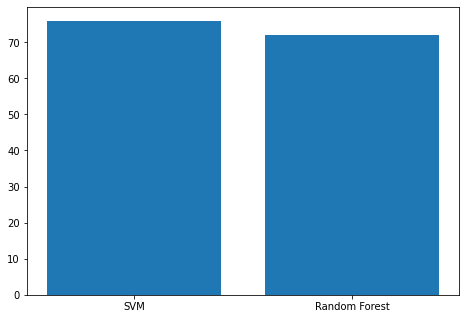

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM', 'Random Forest']
students = [76,72]
ax.bar(langs,students)
plt.show()